In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Kb_T=4.1
dt=1.0e-6
t=8.0
tiempo=int(t/dt)
k10=6.01
k20=0.007
k12=0.21
k21=0.105
x10=1.37*1e-1
x20=1.76*1e-1
x12=8.58*1e-1
x21=-4.2*1e-1
repeticiones=200
cambios=4
fuerzas=zeros(cambios)
fuerzas[0]=0.1
fuerzas[1]=4.0
fuerzas[2]=8.0
fuerzas[3]=16.0
evolucion=zeros((cambios,tiempo))

In [3]:
def rata_de_cambio(estado,f):
    if (estado==1.0):
        respuesta=k10*exp(x10*f/(Kb_T))*dt   
    elif (estado==2.0):
        respuesta=k20*exp(x20*f/(Kb_T))*dt  
    return respuesta        
def rata_de_salida(estado, f):
    if (estado==2.0):
        respuesta=k21*exp(x21*f/(Kb_T))*dt            
    elif (estado==1.0):
        respuesta=k12*exp(x12*f/(Kb_T))*dt   
    return respuesta

In [4]:
for j in range (0,cambios):
    f=fuerzas[j]
    print j
    for k in range (0,repeticiones):
        estado=1.0
        boleano=True 
        t_gillepie=0
        for i in range (0,tiempo):
            while(t_gillepie<double(i)):
                ktot=rata_de_cambio(estado,f)+rata_de_salida(estado, f)
                koff=rata_de_salida(estado,f)/ktot
                kon=rata_de_cambio(estado,f)/ktot
                p=random.uniform()  
                if(p<kon):
                    if(estado ==2.0):
                        estado=1.0
                    elif(estado ==1.0):
                        estado=2.0    
                else:    
                    evolucion[j][:i]+=ones(i)
                    boleano=False
                    break
                c=random.exponential(1.0/ktot)
                t_gillepie=t_gillepie+sum(c)   
            if(boleano==False):
                break
        if (boleano):
            evolucion[j]+=ones(tiempo)               
evolucion=evolucion/repeticiones               

0
1
2
3


(-5, 1)

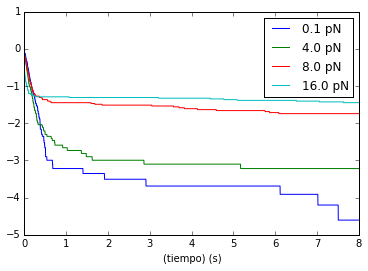

In [7]:
x=linspace(0,t,tiempo)
d=log(evolucion)
plot((x),d[0],label="0.1 pN")
plot((x),d[1],label="4.0 pN")
plot((x),d[2],label="8.0 pN")
plot((x),d[3],label="16.0 pN")
xlabel("(tiempo) (s)")
plt.legend()
ylim(-5,1)